In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import log

from pandas_datareader import data
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os # accessing directory structure
import pandas as pd

import os
for dirname, _, filenames in os.walk("Resources"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

Resources/2018_Financial_Data.csv
Resources/2015_Financial_Data.csv
Resources/2016_Financial_Data.csv
Resources/2017_Financial_Data.csv
Resources/2014_Financial_Data.csv


In [2]:
# Load data
df_2014 = pd.read_csv("Resources/2014_Financial_Data.csv")
df_2015 = pd.read_csv("Resources/2015_Financial_Data.csv")
df_2016 = pd.read_csv("Resources/2016_Financial_Data.csv")
df_2017 = pd.read_csv("Resources/2017_Financial_Data.csv")
df_2018 = pd.read_csv("Resources/2018_Financial_Data.csv")

In [3]:
# Drop rows with no information
df_2014.dropna(how='all', inplace=True)
df_2015.dropna(how='all', inplace=True)
df_2016.dropna(how='all', inplace=True)
df_2017.dropna(how='all', inplace=True)
df_2018.dropna(how='all', inplace=True)

In [4]:
# Describe 2014 dataset variables
df_2014.shape
df_2014.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2015 PRICE VAR [%],Class
count,3.764000e+03,3572.000000,3.734000e+03,3.756000e+03,3.672000e+03,3.749000e+03,3.745000e+03,3.753000e+03,3.745000e+03,3.728000e+03,...,3208.000000,3518.000000,3518.000000,3518.000000,3439.000000,3506.000000,3561.000000,3565.000000,3.808000e+03,3808.000000
mean,5.879050e+09,12.954244,3.700973e+09,2.188214e+09,9.401830e+07,9.307406e+08,1.438144e+09,6.748248e+08,1.002018e+08,5.725866e+08,...,0.036206,4.445793,0.164692,2.279999,0.813931,1.361780,0.596529,0.382284,9.751560e+02,0.429097
std,3.901741e+10,705.605473,3.040688e+10,1.159028e+10,6.408912e+08,4.820928e+09,7.305171e+09,3.786291e+09,6.991091e+08,2.793740e+09,...,0.259765,161.135098,2.195115,92.428920,25.630214,18.734301,25.894049,4.696975,4.098461e+04,0.495012
min,-6.276160e+08,-1.773200,-5.455740e+08,-1.105000e+09,-1.500000e+05,0.000000e+00,-1.088448e+09,-6.786000e+09,-2.250000e+08,-8.878000e+09,...,-1.000000,-1.000000,-1.000000,-0.979600,-230.000000,-1.051000,-1.043700,-1.000000,-1.003972e+02,0.000000
25%,5.788880e+07,-0.002350,3.135714e+06,3.092900e+07,0.000000e+00,1.548900e+07,3.106600e+07,-1.308000e+06,0.000000e+00,-3.732902e+06,...,0.000000,-0.045800,0.000000,-0.015400,-0.084550,-0.048200,0.000000,-0.003900,-2.857143e+01,0.000000
50%,4.349010e+08,0.061850,1.414420e+08,1.908760e+08,0.000000e+00,7.381800e+07,1.386610e+08,4.104400e+07,2.563000e+06,2.842700e+07,...,0.000000,0.014250,0.000000,0.062200,0.037100,0.000000,0.000000,0.068800,-5.281842e+00,0.000000
75%,2.393625e+09,0.188875,1.199844e+09,8.922534e+08,9.911000e+06,3.510000e+08,5.885100e+08,2.712980e+08,4.300000e+07,2.193835e+08,...,0.044000,0.205475,0.063850,0.217100,0.141900,0.210300,0.004700,0.220500,1.331484e+01,1.000000
max,1.824698e+12,42138.663900,1.537249e+12,4.621600e+11,1.153700e+10,1.856830e+11,3.056050e+11,1.565540e+11,3.152300e+10,8.720500e+10,...,3.605800,9328.200000,76.625000,5468.426400,1360.125000,729.576600,1542.611000,225.690000,2.418601e+06,1.000000


Financial Services        660
Healthcare                582
Technology                576
Industrials               501
Consumer Cyclical         457
Basic Materials           242
Real Estate               224
Energy                    221
Consumer Defensive        165
Utilities                  97
Communication Services     83
Name: Sector, dtype: int64

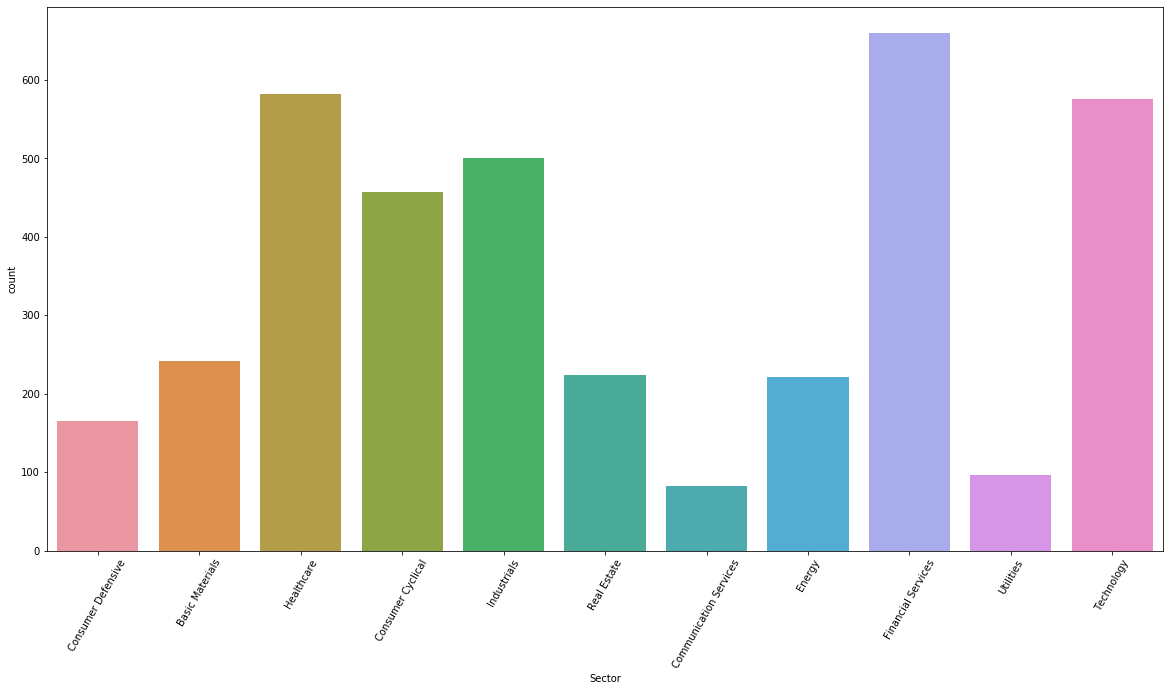

In [5]:
plt.figure(figsize = (20,10))
plot = sns.countplot(df_2014['Sector'])

plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
df_2014.Sector.value_counts()

In [6]:
# Describe 2015 dataset variables
df_2015.shape
df_2015.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2016 PRICE VAR [%],Class
count,4.053000e+03,3780.000000,3.927000e+03,4.055000e+03,3.855000e+03,3.950000e+03,3.946000e+03,4.078000e+03,3.945000e+03,4.017000e+03,...,3445.000000,3752.000000,3751.000000,3751.000000,3662.000000,3721.000000,3769.000000,3773.000000,4120.000000,4120.000000
mean,5.005532e+09,0.289257,3.194520e+09,1.884870e+09,9.605866e+07,8.390737e+08,1.358340e+09,5.072675e+08,9.448146e+07,4.072179e+08,...,0.012775,0.524476,0.143941,0.428794,1.982999,2.834435,0.294680,0.313609,103.077642,0.701699
std,3.455765e+10,3.579223,2.837197e+10,8.398565e+09,6.755995e+08,3.487307e+09,5.194782e+09,2.774280e+09,5.302102e+08,2.427021e+09,...,0.276812,6.678239,3.115030,4.205201,116.556190,91.533758,5.666982,5.798361,3756.530836,0.457568
min,-3.357020e+08,-1.064300,-2.665346e+09,-1.280800e+10,-4.179153e+06,0.000000e+00,-5.495512e+09,-1.933900e+10,-1.710954e+09,-1.910900e+10,...,-1.000000,-1.000000,-1.000000,-0.996400,-379.478300,-1.000000,-1.000000,-0.991200,-99.947830,0.000000
25%,5.867900e+07,-0.051950,2.840826e+06,2.792500e+07,0.000000e+00,1.713775e+07,3.410525e+07,-5.739400e+06,0.000000e+00,-1.058800e+07,...,0.000000,-0.108450,-0.011400,-0.052500,-0.131850,-0.064400,0.000000,-0.033100,-5.172844,0.000000
50%,4.083450e+08,0.031850,1.448460e+08,1.783760e+08,0.000000e+00,7.564400e+07,1.474340e+08,3.108000e+07,2.844000e+06,1.952500e+07,...,0.000000,0.000000,0.000000,0.034500,0.010250,0.000000,0.000000,0.052400,17.278935,1.000000
75%,2.219136e+09,0.160325,1.153572e+09,8.336660e+08,1.121000e+07,3.540000e+08,6.214052e+08,2.336181e+08,4.460000e+07,1.721000e+08,...,0.034900,0.143350,0.022250,0.169700,0.111325,0.164900,0.000000,0.188300,40.567983,1.000000
max,1.886894e+12,189.817900,1.581527e+12,3.053670e+11,1.306700e+10,9.341800e+10,9.341800e+10,7.123000e+10,1.844600e+10,7.251500e+10,...,3.941000,220.341000,170.427600,153.720000,7039.325900,5443.000000,297.736800,324.926800,212700.011623,1.000000


Financial Services        769
Healthcare                628
Technology                606
Industrials               532
Consumer Cyclical         479
Basic Materials           265
Real Estate               240
Energy                    236
Consumer Defensive        175
Utilities                 103
Communication Services     87
Name: Sector, dtype: int64

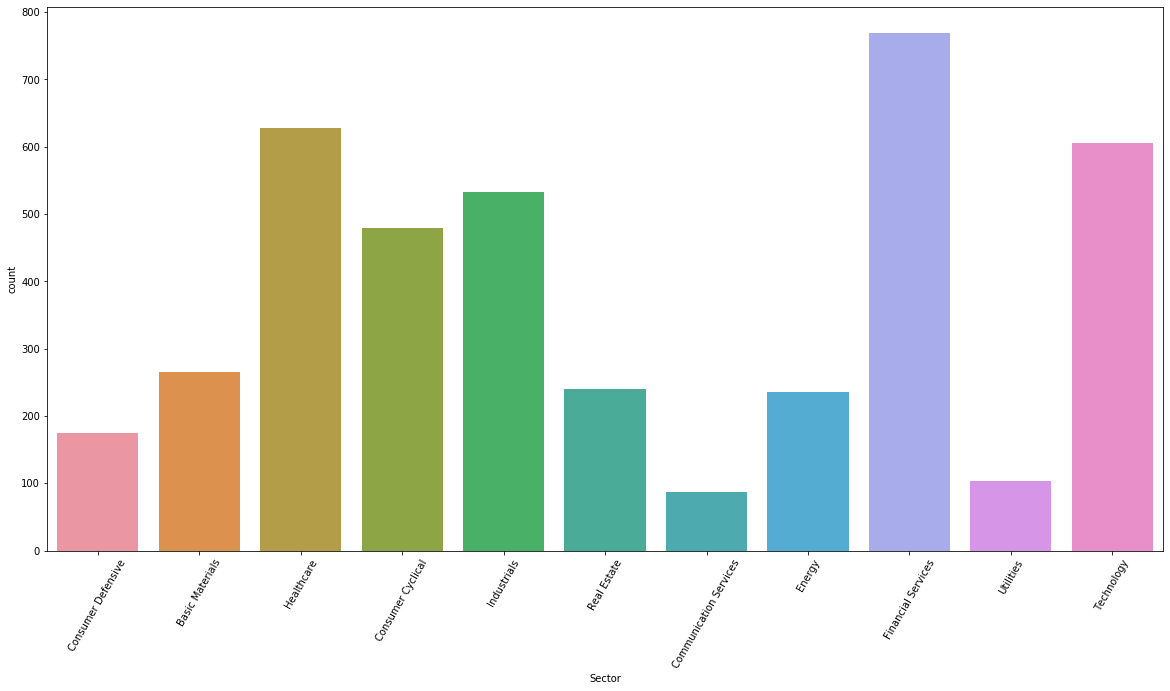

In [7]:
plt.figure(figsize = (20,10))
plot = sns.countplot(df_2015['Sector'])

plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
df_2015.Sector.value_counts()

In [8]:
# Describe 2016 dataset variables
df_2016.shape
df_2016.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2017 PRICE VAR [%],Class
count,4.308000e+03,4148.000000,4.157000e+03,4.305000e+03,4.084000e+03,4.184000e+03,4.177000e+03,4.332000e+03,4.177000e+03,4.266000e+03,...,3667.000000,4157.000000,4072.000000,4075.000000,3924.000000,4001.000000,4025.000000,4041.000000,4.797000e+03,4797.000000
mean,4.802586e+09,1.520193,3.060024e+09,1.824267e+09,1.007484e+08,8.308651e+08,1.287227e+09,5.239260e+08,9.451615e+07,4.309792e+08,...,0.005076,0.812488,0.185010,0.583518,0.759701,2.593773,0.149195,0.252307,3.650260e+02,0.670836
std,3.261058e+10,52.397806,2.705305e+10,7.913180e+09,7.347024e+08,3.465465e+09,4.930970e+09,2.548440e+09,4.355067e+08,2.190013e+09,...,0.282685,21.477336,3.848082,14.082608,91.443780,54.310889,3.591208,3.349447,1.940149e+04,0.469959
min,-3.819270e+08,-12.769300,-2.639031e+09,-3.564190e+09,-8.610000e+07,-5.207792e+07,-9.357000e+08,-6.770000e+09,-1.107000e+09,-7.621000e+09,...,-1.000000,-1.000000,-1.000000,-1.000000,-3963.131200,-1.000000,-2.662200,-2.099000,-9.999941e+01,0.000000
25%,5.212225e+07,-0.047275,2.699000e+06,2.659882e+07,0.000000e+00,1.696775e+07,3.431300e+07,-5.629444e+06,0.000000e+00,-9.890840e+06,...,0.000000,-0.049300,0.000000,-0.040700,-0.122950,-0.080100,0.000000,-0.027700,-6.730768e+00,0.000000
50%,4.059750e+08,0.032300,1.422140e+08,1.764620e+08,0.000000e+00,7.584050e+07,1.509050e+08,3.043300e+07,3.275789e+06,1.993900e+07,...,0.000000,0.006000,0.000000,0.040100,0.025650,0.000000,0.000000,0.048700,1.090686e+01,1.000000
75%,2.056847e+09,0.160525,1.106300e+09,8.003870e+08,1.237750e+07,3.505530e+08,5.941360e+08,2.242548e+08,4.717500e+07,1.655055e+08,...,0.040050,0.199100,0.028500,0.146700,0.122550,0.124900,0.000000,0.179200,3.155634e+01,1.000000
max,1.822805e+12,3234.456800,1.548384e+12,2.744210e+11,1.608500e+10,9.704100e+10,9.704100e+10,6.002400e+10,1.517600e+10,6.137200e+10,...,5.400500,1340.695700,217.041700,636.156900,3710.666700,2893.736800,224.818200,122.895700,1.321281e+06,1.000000


Financial Services        1220
Healthcare                 686
Technology                 643
Industrials                566
Consumer Cyclical          509
Basic Materials            279
Real Estate                258
Energy                     246
Consumer Defensive         192
Utilities                  106
Communication Services      92
Name: Sector, dtype: int64

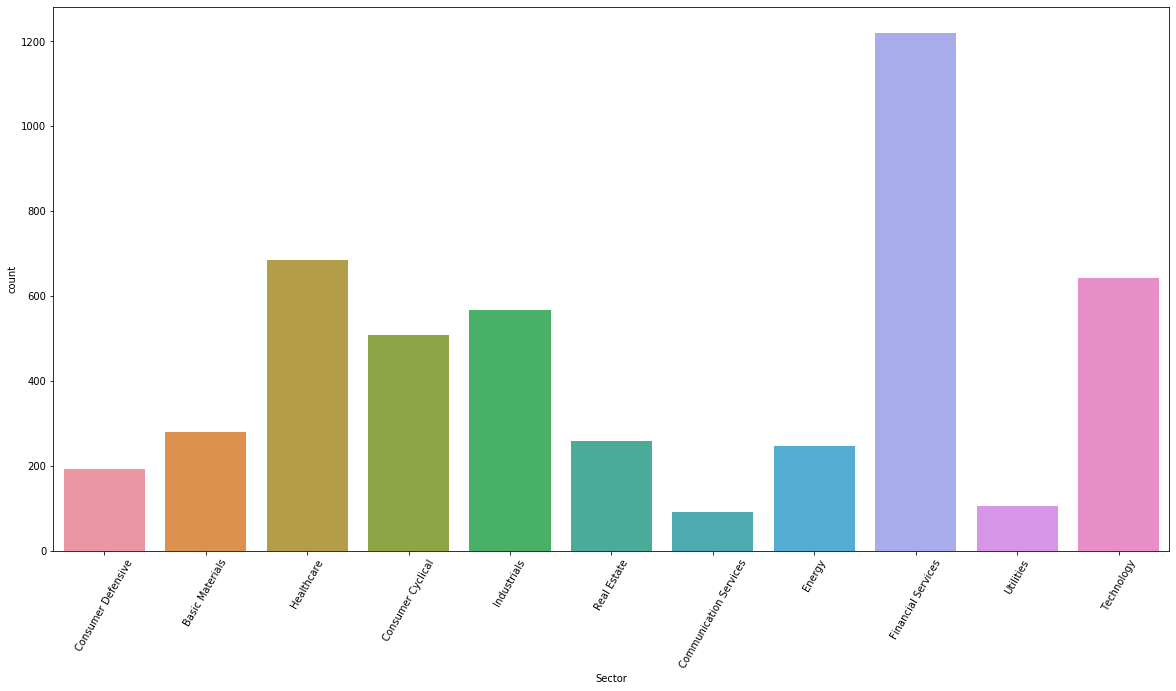

In [9]:
plt.figure(figsize = (20,10))
plot = sns.countplot(df_2016['Sector'])

plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
df_2016.Sector.value_counts()

In [10]:
# Describe 2017 dataset variables
df_2017.shape
df_2017.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2018 PRICE VAR [%],Class
count,4.435000e+03,4236.000000,4.281000e+03,4.426000e+03,4.173000e+03,4.299000e+03,4.299000e+03,4.456000e+03,4.283000e+03,4.381000e+03,...,3877.000000,4257.000000,4149.00000,4168.000000,4067.00000,4106.000000,4110.000000,4132.000000,4960.000000,4960.000000
mean,5.085608e+09,0.953124,3.235881e+09,1.934378e+09,1.061590e+08,8.532075e+08,1.331302e+09,5.943889e+08,9.961462e+07,4.974142e+08,...,0.005444,9.660352,0.11746,1.084989,0.22719,1.457853,0.383984,0.719938,-4.461547,0.276210
std,3.148389e+10,18.956861,2.619288e+10,7.911822e+09,7.983065e+08,3.521939e+09,5.214527e+09,2.763764e+09,4.185841e+08,2.362747e+09,...,0.256422,370.977527,1.07944,32.740851,4.59341,33.852958,13.378255,31.830424,561.802215,0.447167
min,-3.004500e+07,-6.872700,-2.986888e+09,-8.138230e+08,-1.098000e+08,-1.043667e+08,-1.088000e+09,-1.868300e+10,-1.932443e+08,-1.819800e+10,...,-1.000000,-1.000000,-1.00000,-1.000000,-221.00000,-1.000000,-1.218100,-2.369900,-99.999115,0.000000
25%,5.900000e+07,0.000000,3.945000e+06,3.200000e+07,0.000000e+00,1.861650e+07,3.700850e+07,-4.376053e+06,0.000000e+00,-9.396000e+06,...,0.000000,-0.003000,0.00000,-0.008050,-0.06225,-0.059250,0.000000,-0.003925,-33.388915,0.000000
50%,4.400000e+08,0.073050,1.588160e+08,1.993761e+08,0.000000e+00,8.360500e+07,1.638000e+08,3.739450e+07,4.800000e+06,2.464000e+07,...,0.000000,0.054600,0.00000,0.066300,0.06060,0.000000,0.000000,0.067250,-13.336397,0.000000
75%,2.254111e+09,0.211625,1.170103e+09,8.823762e+08,1.400000e+07,3.711330e+08,6.229360e+08,2.604446e+08,5.300000e+07,1.976460e+08,...,0.037100,0.249200,0.09070,0.203425,0.19230,0.152600,0.001175,0.182500,2.124593,1.000000
max,1.695864e+12,825.959800,1.465577e+12,2.302870e+11,2.262000e+10,1.018530e+11,1.018530e+11,6.513565e+10,1.340100e+10,6.408900e+10,...,3.561000,18499.000000,43.55340,2014.273300,84.12770,1981.061600,837.000000,2042.000000,39219.999109,1.000000


Financial Services        1247
Healthcare                 718
Technology                 665
Industrials                595
Consumer Cyclical          520
Basic Materials            282
Energy                     266
Real Estate                264
Consumer Defensive         199
Utilities                  110
Communication Services      94
Name: Sector, dtype: int64

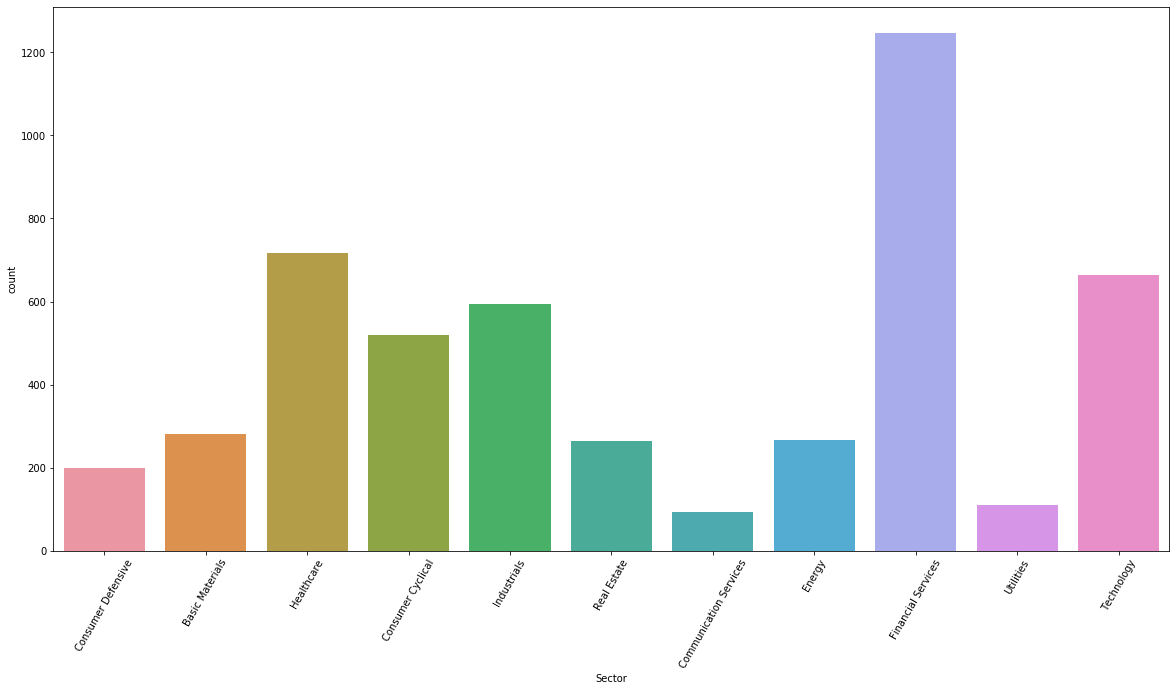

In [11]:
plt.figure(figsize = (20,10))
plot = sns.countplot(df_2017['Sector'])

plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
df_2017.Sector.value_counts()

In [12]:
# Describe 2018 dataset variables
df_2018.shape
df_2018.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2019 PRICE VAR [%],Class
count,4.392000e+03,4392.000000,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,...,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000
mean,5.066018e+09,3.345923,3.012308e+09,2.014126e+09,1.116492e+08,8.665784e+08,1.375517e+09,6.489080e+08,9.593988e+07,5.494155e+08,...,0.005631,35.730433,0.173395,1.321333,0.246331,9.331654,0.086472,0.144936,20.803948,0.693534
std,2.039488e+10,192.386555,1.477784e+10,7.629580e+09,9.079503e+08,3.598635e+09,5.422537e+09,2.958055e+09,3.705411e+08,2.618849e+09,...,0.230619,2313.709658,4.562670,34.258619,5.437076,352.622257,0.798925,0.816362,82.622147,0.461078
min,-6.894100e+07,-3.461500,-2.669055e+09,-1.818220e+09,-1.042000e+08,-1.401594e+08,-4.280000e+09,-1.455700e+10,-1.408252e+09,-2.177200e+10,...,-1.000000,-1.000000,-1.000000,-0.999100,-32.258100,-1.000000,-1.000000,-1.000000,-99.864779,0.000000
25%,6.130850e+07,0.000000,1.455000e+05,3.177925e+07,0.000000e+00,1.649300e+07,3.477450e+07,-5.199308e+06,0.000000e+00,-9.525389e+06,...,0.000000,-0.041800,0.000000,-0.032200,-0.095025,-0.070100,0.000000,0.000000,-7.477173,0.000000
50%,4.804960e+08,0.071150,1.464660e+08,2.124950e+08,0.000000e+00,8.250950e+07,1.625480e+08,4.048028e+07,4.212500e+06,2.546850e+07,...,0.000000,0.000500,0.000000,0.028550,0.014200,0.000000,0.000000,0.057800,17.639393,1.000000
75%,2.424800e+09,0.181025,1.172762e+09,9.550422e+08,1.128625e+07,3.836575e+08,6.360000e+08,2.790345e+08,5.300975e+07,2.178985e+08,...,0.029025,0.178075,0.067550,0.146600,0.125575,0.098850,0.000000,0.155800,39.625879,1.000000
max,5.000000e+11,12739.000000,3.730000e+11,1.270000e+11,2.883700e+10,1.070000e+11,1.070000e+11,7.089800e+10,9.168000e+09,7.290300e+10,...,4.079100,153332.333300,293.473000,1184.993800,313.395800,17646.823500,36.898100,43.718800,3756.716345,1.000000


Financial Services        824
Healthcare                691
Technology                636
Industrials               574
Consumer Cyclical         506
Basic Materials           276
Real Estate               255
Energy                    248
Consumer Defensive        191
Utilities                 102
Communication Services     89
Name: Sector, dtype: int64

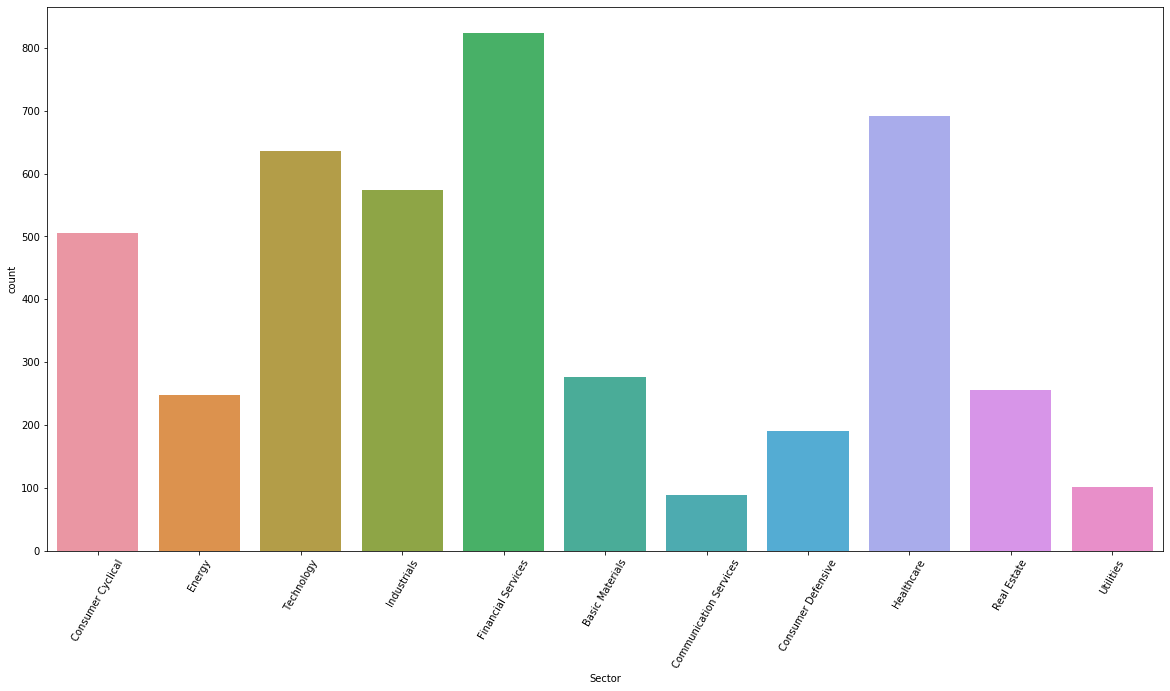

In [13]:
plt.figure(figsize = (20,10))
plot = sns.countplot(df_2018['Sector'])

plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
df_2018.Sector.value_counts()

In [14]:
# Load data
df_2014 = pd.read_csv("Resources/2014_Financial_Data.csv")
df_2015 = pd.read_csv("Resources/2015_Financial_Data.csv")
df_2016 = pd.read_csv("Resources/2016_Financial_Data.csv")
df_2017 = pd.read_csv("Resources/2017_Financial_Data.csv")
df_2018 = pd.read_csv("Resources/2018_Financial_Data.csv")

In [15]:
df_2014.fillna(0,inplace=True)
df_2015.fillna(0,inplace=True)
df_2016.fillna(0,inplace=True)
df_2017.fillna(0,inplace=True)
df_2018.fillna(0,inplace=True)

In [16]:
# Considering Procter & Gamble company only 
df_2014 = df_2014[df_2014['Unnamed: 0'] =='PG' ]
df_2015 = df_2015[df_2015['Unnamed: 0'] =='PG' ]
df_2016 = df_2016[df_2016['Unnamed: 0'] =='PG' ]
df_2017 = df_2017[df_2017['Unnamed: 0'] =='PG' ]
df_2018 = df_2018[df_2018['Unnamed: 0'] =='PG' ]

In [17]:
df = df_2014.append([df_2015,df_2016,df_2017,df_2018])
df.fillna(0,inplace=True)
df.index = [2014,2015,2016,2017,2018]

Mean of Quick Ratio for P&G last 5 year is 0.57 


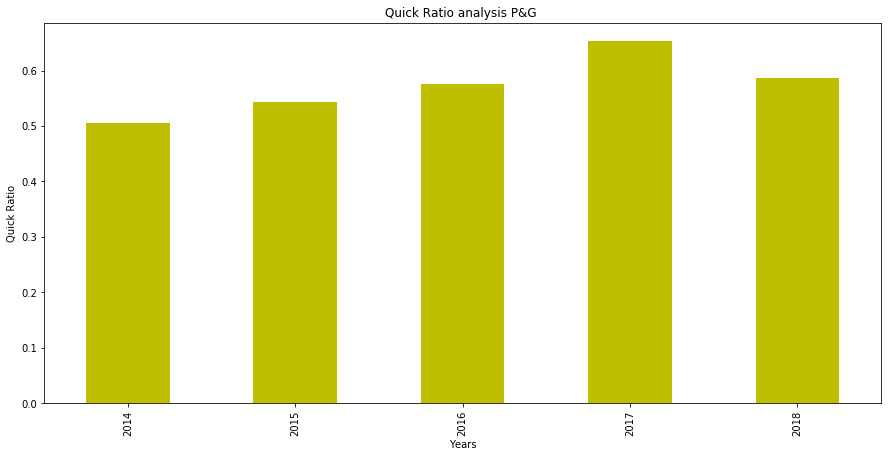

In [18]:
# Quick Ratio analysis
print("Mean of Quick Ratio for P&G last 5 year is {:.2f} ".format(df['quickRatio'].mean()))
plt.figure(figsize=(15, 7))
df['quickRatio'].plot.bar(color='y')
plt.xlabel('Years')
plt.ylabel('Quick Ratio')
plt.title('Quick Ratio analysis P&G ')
plt.grid(False)
plt.show()

Mean of Current Ratio for P&G last 5 year is 0.95 


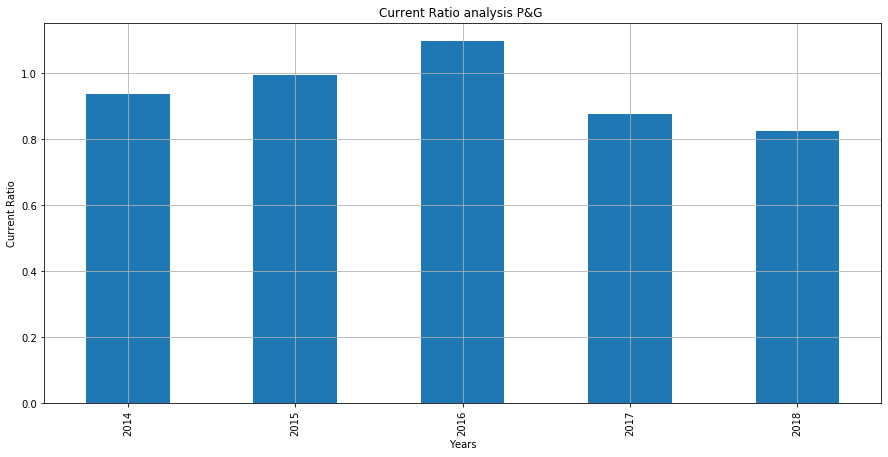

In [19]:
# Current ratio
print("Mean of Current Ratio for P&G last 5 year is {:.2f} ".format(df['currentRatio'].mean()))
plt.figure(figsize=(15, 7))
df['currentRatio'].plot.bar()
plt.xlabel('Years')
plt.ylabel('Current Ratio')
plt.title('Current Ratio analysis P&G ')
plt.grid(True)
plt.show()

Mean of Debt to Equity  Ratio for P&G last 5 year is 0.53 


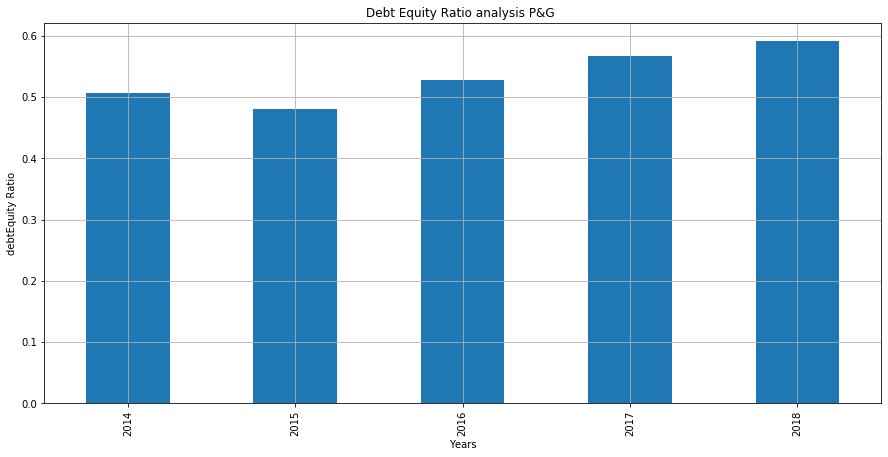

In [20]:
# Debt to Equity ratio
print("Mean of Debt to Equity  Ratio for P&G last 5 year is {:.2f} ".format(df['debtEquityRatio'].mean()))
plt.figure(figsize=(15, 7))
df['debtEquityRatio'].plot.bar()
plt.xlabel('Years')
plt.ylabel('debtEquity Ratio')
plt.title('Debt Equity Ratio analysis P&G ')
plt.grid(True)
plt.show()

Mean of Inventory Turnover for P&G last 5 year is 12.92 


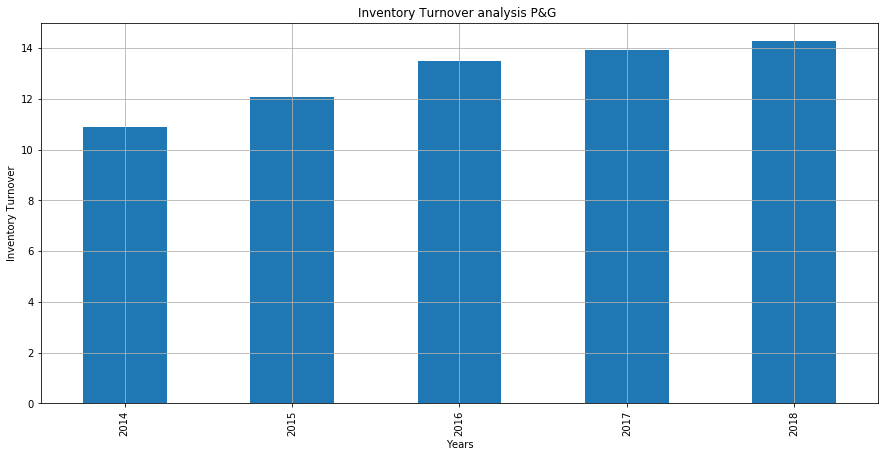

In [21]:
# Return on equity
print("Mean of Inventory Turnover for P&G last 5 year is {:.2f} ".format(df['inventoryTurnover'].mean()))
plt.figure(figsize=(15, 7))
df['inventoryTurnover'].plot.bar()
plt.xlabel('Years')
plt.ylabel('Inventory Turnover')
plt.title('Inventory Turnover analysis P&G ')
plt.grid(True)
plt.show()

In [22]:
df['ShortTermAssest'] = df['Cash and cash equivalents'] + df['Cash and short-term investments']+df['Inventories']+df['Average Receivables']\
                        + df['Investments']+df['Investment purchases and sales']+df['Short-term investments']

df['liquidcash'] = df['Cash and cash equivalents'] + df['Cash and short-term investments']

Mean of short Term assest for P&G last 5 year is 40091400000.00 


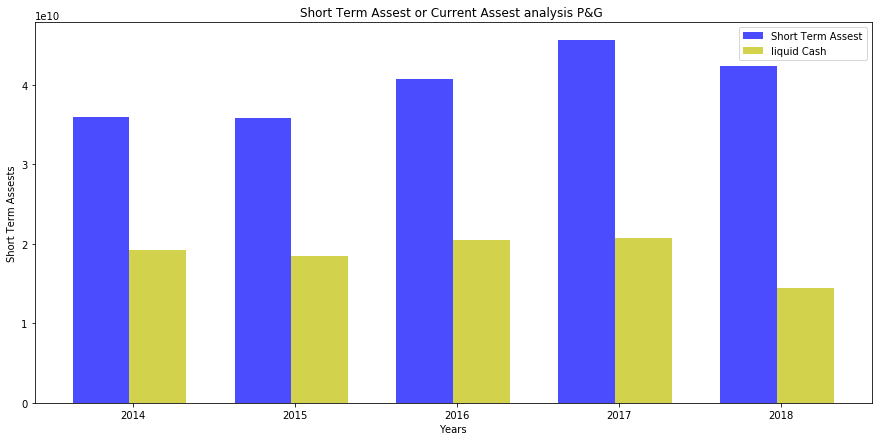

In [23]:
# Short Term Assets
n_year = 5
index = np.arange(n_year)
bar_width = 0.35
opacity = 0.7

print("Mean of short Term assest for P&G last 5 year is {:.2f} ".format(df['ShortTermAssest'].mean()))

plt.figure(figsize=(15, 7))
plt.bar(index,df['ShortTermAssest'],bar_width,alpha=opacity,color='b',label='Short Term Assest')
plt.bar(index+bar_width,df['liquidcash'],bar_width,alpha=opacity,color='y',label='liquid Cash')
plt.xlabel('Years')
plt.ylabel('Short Term Assests')
plt.title('Short Term Assest or Current Assest analysis P&G ')
plt.xticks(index+0.20, df.index)
plt.grid(False)
plt.legend()
plt.show()

Mean of Long Term assest for P&G last 5 year is 92571200000.00 
Mean Percentage Long Term asset out of Total Asset for P&G last 5 year is 72.40% 


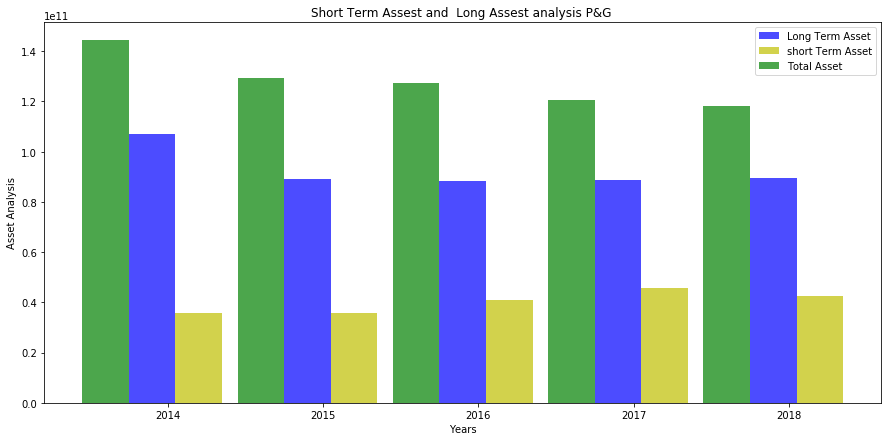

In [24]:
# Long Term Asset and Short-Term Asset
df['LongTermAsset'] = df['Property, Plant & Equipment Net'] +df['Goodwill and Intangible Assets']+df['Long-term investments']
# Long term Asset
n_year = 5
index = np.arange(n_year)
bar_width = 0.3
opacity = 0.7

print("Mean of Long Term assest for P&G last 5 year is {:.2f} ".format(df['LongTermAsset'].mean()))

print("Mean Percentage Long Term asset out of Total Asset for P&G last 5 year is {:.2f}% ".format((df['LongTermAsset'].mean()/df['Total assets'].mean())*100))


plt.figure(figsize=(15, 7))
plt.bar(index,df['LongTermAsset'],bar_width,alpha=opacity,color='b',label='Long Term Asset')
plt.bar(index+bar_width,df['ShortTermAssest'],bar_width,alpha=opacity,color='y',label='short Term Asset')
plt.bar(index-bar_width,df['Total assets'],bar_width,alpha=opacity,color='g',label='Total Asset')
plt.xlabel('Years')
plt.ylabel('Asset Analysis')
plt.title('Short Term Assest and  Long Assest analysis P&G ')
plt.xticks(index+0.10, df.index)
plt.grid(False)
plt.legend()
plt.show();